### Set local path

In [1]:
your_local_path="D:/UpX_Academy/Python_Projects/Project_5_Facebook_data/"

### Import necessary libraries and packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
from IPython.display import Markdown, display

### Define printmd function to print in BOLD letters.

In [3]:
def printmd(string):
    display(Markdown(string))

### Read Facebook dataset and display few top rows

In [4]:
fb = pd.read_csv(your_local_path+"pseudo_facebook.tsv", sep = '\t')
fb.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


### Check the number of rows and columns in the Dataset

In [5]:
fb.shape

(99003, 15)

### Check the columns with NAN values

In [6]:
fb.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

### Check few row data with the NAN values.

In [10]:
fb[fb.isnull().any(axis=1)].head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
3224,1781137,25,3,1988,1,NaN,203.0,1,1,1,0,1,0,0,0
4123,1110111,31,12,1982,1,NaN,227.0,2,2,0,0,0,0,0,0
5920,2000185,25,15,1988,2,NaN,239.0,4,4,0,0,0,0,0,0
6432,1137054,59,18,1954,2,NaN,2076.0,4,0,23,5,23,4,0,1
6870,1783336,62,5,1951,9,NaN,2047.0,5,0,0,1,0,1,0,0


### Drop the NAN values and assign the rest of values to new Dataframe

In [144]:
fbnull=fb.dropna()
fbnull.shape

(98826, 15)

### Check the distribution of the gender based likes_recieved

In [145]:
print(fbnull.groupby(['gender']).likes_received.describe())
printmd("*Above result shows huge difference between the likes received*")

          count        mean          std  min  25%   50%    75%       max
gender                                                                   
female  40252.0  251.445965  2041.668144  0.0  3.0  29.0  153.0  261197.0
male    58574.0   67.911548   613.921860  0.0  0.0   4.0   25.0   82623.0


*Above result shows huge difference between the likes received*

### Set NAN values of gender, based on the likes_recieved. if likes>100 then female otherwise men

In [146]:
for i in fb.index[fb.isnull().any(axis=1)]:
    if fb.loc[i,'likes_received'] > 100:
        fb.loc[i,'gender'] = 'female'
    else:
        fb.loc[i,'gender'] = 'male'

### Set missing tenure values with the mean of that column.

In [147]:
fb['tenure'].fillna(fb.tenure.mean(), inplace=True)

### Visualize likes received gender wise

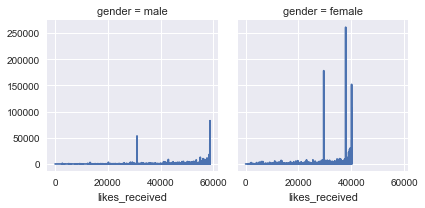

*Above graphs shows that female received much higher number of likes as compared to male*

In [148]:

g = sns.FacetGrid(fb, col='gender')
g = g.map(plt.plot,'likes_received')
plt.show()
printmd("*Above graphs shows that female received much higher number of likes as compared to male*")

### Visualise date of birth distribution across dataset

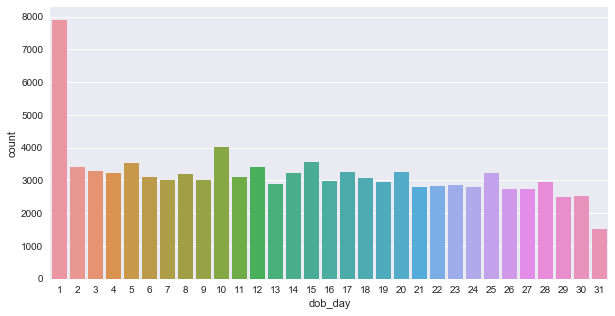

*There is an unusual pattern in the DOB with almost 10% of dob set as 1st. let us factorize it further*

In [149]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='dob_day', data=fb)
plt.show()
printmd("*There is an unusual pattern in the DOB with almost 10% of dob set as 1st. let us factorize it further*")

### Visualise date of birth distribution month wise

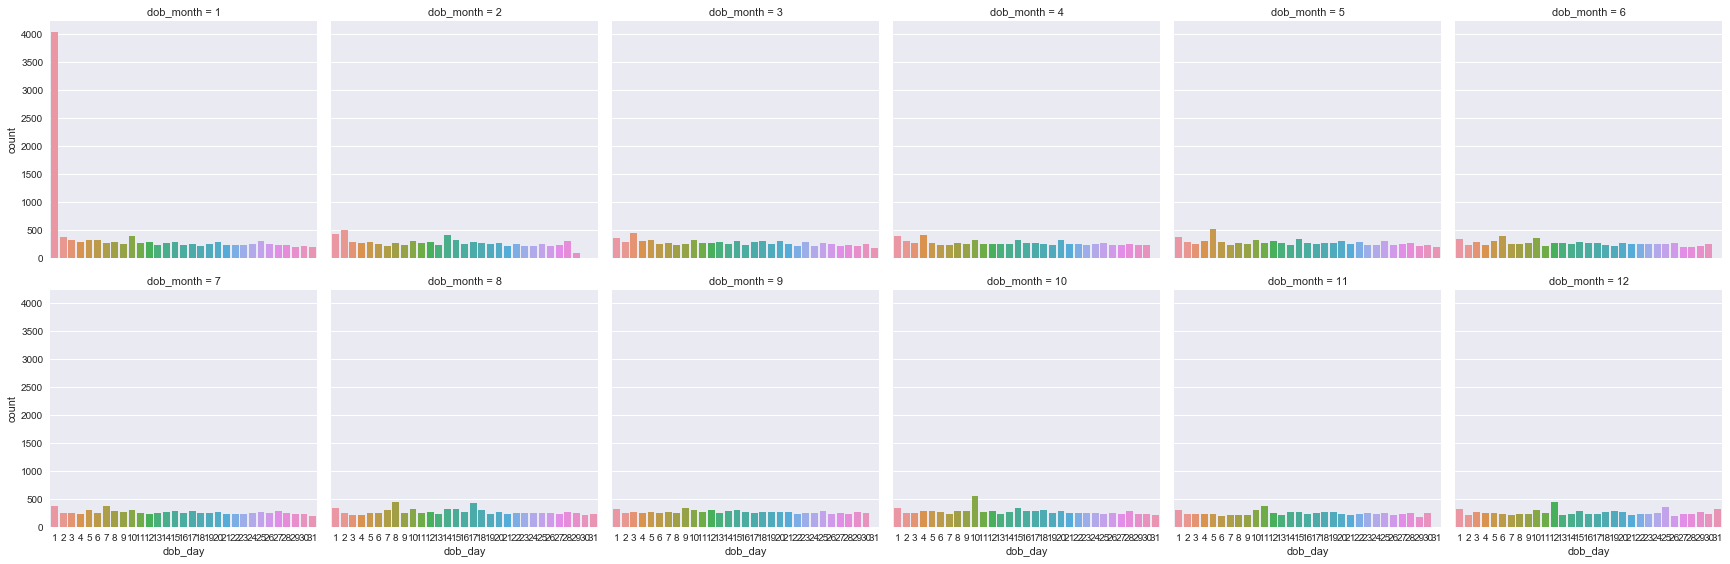

*So it is evident from above that many people have marked there DOB as 1-Jan to avoid mentioning there original DOB*

In [150]:
sns.factorplot(x='dob_day', col='dob_month', data=fb, col_wrap=6, kind='count')
plt.show()
printmd("*So it is evident from above that many people have marked there DOB as 1-Jan to avoid mentioning there original DOB*")

### Analyze Friend count distribution gender wise

In [151]:
print(fb.groupby('gender').friend_count.describe())

          count        mean         std  min   25%   50%    75%     max
gender                                                                 
female  40289.0  242.114969  475.962327  0.0  37.0  96.0  244.0  4923.0
male    58714.0  164.947832  308.328099  0.0  27.0  74.0  182.0  4917.0


### Visualize friend count distribution gender wise

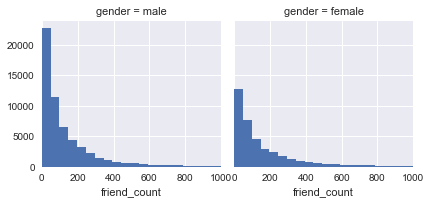

*Above chart shows that men has more number of 0 friends as compared to women*

In [152]:
g = sns.FacetGrid(fb, col='gender')
g = g.map(plt.hist, 'friend_count', bins=100)
plt.xlim(0,1000)
plt.show()
printmd("*Above chart shows that men has more number of 0 friends as compared to women*")

### Visualise Friend count on basis of age distribution

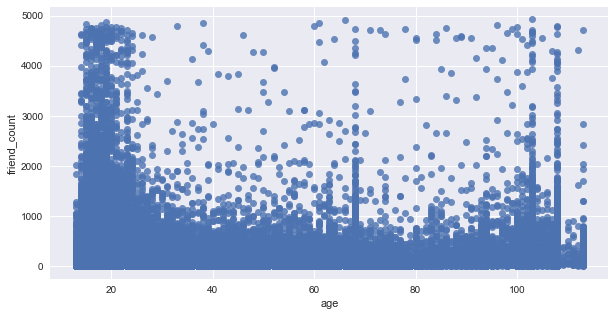

*From the above graph it is evident that:*

*1. Graph starts between 10-15 years of age*

*2. Most friend count are accumulated near the 20 years of age*

*3. People around 70 years of age have high friend count*

*4. People over 100 years of age has high friend count which is abnormal and point to mistake in dataset*

In [153]:
sns.regplot(x='age', y='friend_count', data=fb, fit_reg=False)
plt.show()
printmd("*From the above graph it is evident that:*")
printmd("*1. Graph starts between 10-15 years of age*")
printmd("*2. Most friend count are accumulated near the 20 years of age*")
printmd("*3. People around 70 years of age have high friend count*")
printmd("*4. People over 100 years of age has high friend count which is abnormal and point to mistake in dataset*")

### Visualise Friendship Initiated on basis of age distribution

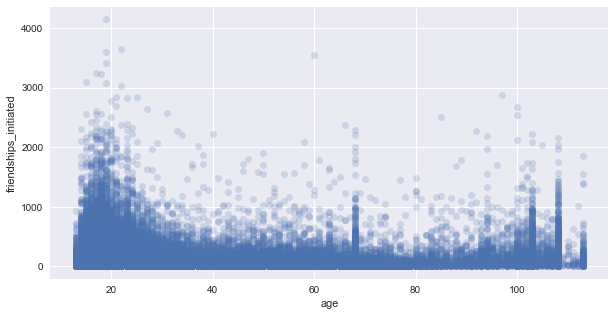

*Above graph shows similar trend like the friend_count*

In [154]:
sns.regplot(x='age',y='friendships_initiated',data=fb,fit_reg=False, scatter_kws={'alpha': 0.2})
plt.show()
printmd("*Above graph shows similar trend like the friend_count*")

### Analyze people tenure yearly

In [155]:
fb['yearly_tenure'] = fb.tenure/365
fb.yearly_tenure.describe()

count    99003.000000
mean         1.473664
std          1.253823
min          0.000000
25%          0.619178
50%          1.128767
75%          1.849315
max          8.600000
Name: yearly_tenure, dtype: float64

### Visualize people tenure across the dataset

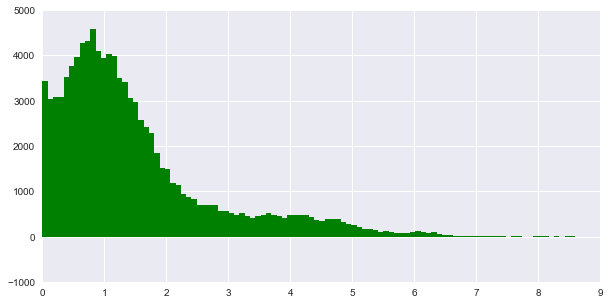

*Above graph depicts following :*

*1. It's a long tailed graph with very few people have tenure more than 6.5 years*

*2. Almost 50% of people are having around 1 year tenure*

In [156]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(fb.yearly_tenure, bins=100, color='g')
plt.ylim(-1000,5000)
plt.xlim(0,9)
plt.show()
printmd("*Above graph depicts following :*")
printmd("*1. It's a long tailed graph with very few people have tenure more than 6.5 years*")
printmd("*2. Almost 50% of people are having around 1 year tenure*")

### Visualise people's tenure according to there age

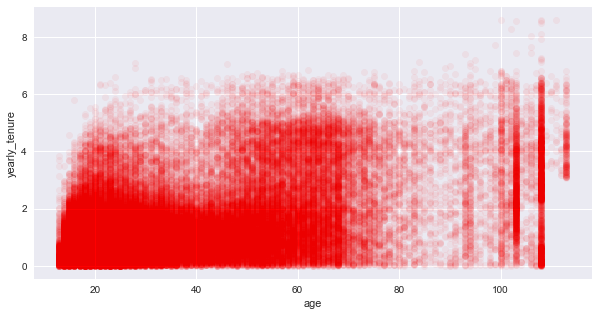

*Above graph shows below patterns:*

*1. There are fewer people between age range of 70-100 with FB account*

*2. There are more number of people above 100 years of age with consistent FB tenure which shows dataset inconsistency*

In [157]:
sns.regplot(x='age',y='yearly_tenure',data=fb,fit_reg=False, scatter_kws={'alpha': 0.05}, color='r')
plt.show()
printmd("*Above graph shows below patterns:*")
printmd("*1. There are fewer people between age range of 70-100 with FB account*")
printmd("*2. There are more number of people above 100 years of age with consistent FB tenure which shows dataset inconsistency*")